<a href="https://colab.research.google.com/github/datawarlock1/Data-Analysis/blob/main/SALES_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os 

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sales_Data/Sales_April_2019.csv") #Reading the CSV file.
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18383 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18324 non-null  object
 1   Product           18324 non-null  object
 2   Quantity Ordered  18324 non-null  object
 3   Price Each        18324 non-null  object
 4   Order Date        18324 non-null  object
 5   Purchase Address  18324 non-null  object
dtypes: object(6)
memory usage: 861.8+ KB


Out of 18383 columns we have approximately 50 columns with null values.

In [ ]:
df.isna().any()

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

Hence there are NaN values. We will need to clean that up.

In [ ]:
files = [file for file in os.listdir('/content/drive/MyDrive/Colab Notebooks/Sales_Data')] #Reading all files.

for file in files:
  print(file)

Sales_November_2019.csv
Sales_February_2019.csv
Sales_August_2019.csv
Sales_January_2019.csv
Sales_May_2019.csv
Sales_April_2019.csv
Sales_October_2019.csv
Sales_December_2019.csv
Sales_September_2019.csv
Sales_March_2019.csv
Sales_June_2019.csv
Sales_July_2019.csv


In [ ]:
Merged = pd.DataFrame() #Merging the files.

for file in files:
  df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sales_Data"+"/"+file)
  Merged = pd.concat([Merged,df])

Merged.to_csv("/content/drive/MyDrive/Colab Notebooks/Merged_new.csv",index = False)


In [ ]:
dfn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Merged_new.csv')
dfn.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


In [ ]:
dfn['Month'] = dfn['Order Date'].str.split('/').str[0] #Splitting Month.
dfn.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11


In [ ]:
nandf = dfn[dfn.isna().any(axis = 1)] #Removing NaN values.
nandf.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
69,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
544,NaN,NaN,NaN,NaN,NaN,NaN,NaN
546,NaN,NaN,NaN,NaN,NaN,NaN,NaN
781,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfn = dfn.dropna(how='all')
dfn.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11


In [ ]:
dfnn = dfn[dfn['Order Date'].str[0:2] != 'Or']
dfnn.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11


#Converting strings into integers for Data analysis purposes.

In [ ]:
dfnn['Month']=dfnn['Month'].astype('int64')
dfnn['Quantity Ordered']= pd.to_numeric(dfnn['Quantity Ordered'])
dfnn['Price Each']= pd.to_numeric(dfnn['Price Each'])
dfnn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 11.3+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

#Question : What was the best month for sales? How much was earned that month?

In [ ]:
dfnn['Sales'] = dfnn['Quantity Ordered']*dfnn['Price Each']
dfnn.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99


In [ ]:
dfnn.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


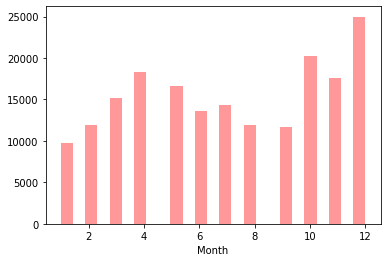

In [ ]:
import seaborn as sns
sns.distplot(dfnn['Month'], kde =False,color='red', bins=25)

##We can clearly see that Twelfth month was the best.

In [ ]:
def get_city(address):    #separating City and State and combining them to avoid duplication and merge of same columns.
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

dfnn['City'] = dfnn['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
dfnn.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State,City
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99,New York City NY,New York City (NY)
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90,Austin TX,Austin (TX)
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles CA,Los Angeles (CA)
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99,Seattle WA,Seattle (WA)
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99,Boston MA,Boston (MA)


In [ ]:
dfnn.drop(['State'],axis=1,inplace=True) #dropping State column.
dfnn.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99,New York City (NY)
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90,Austin (TX)
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles (CA)
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99,Seattle (WA)
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99,Boston (MA)


#Question : What city sold the most product?

In [ ]:
Cities = dfnn.groupby('City').sum() #Finding the City wise Sales figures.
Cities

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


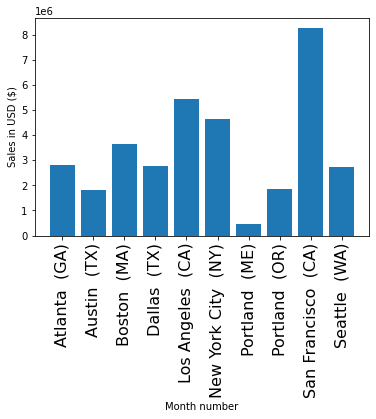

In [ ]:
import matplotlib.pyplot as plt #Plotting Histogram for Better Visualization.

keys = [city for city, df in dfnn.groupby(['City'])]

plt.bar(keys,Cities['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=16)
plt.show()

#Question : What time should we display advertisements to maximize likelihood of customer's buying product?

In [ ]:
dfnn['Hour'] = pd.to_datetime(dfnn['Order Date']).dt.hour   # Add hour column by using datetime function in pandas.
dfnn['Minute'] = pd.to_datetime(dfnn['Order Date']).dt.minute
dfnn['Count'] = 1
dfnn.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001",11,11.99,New York City (NY),9,54,1
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301",11,23.90,Austin (TX),10,3,1
2,278799,Apple Airpods Headphones,1,150.00,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001",11,150.00,Los Angeles (CA),14,56,1
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101",11,149.99,Seattle (WA),22,24,1
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215",11,99.99,Boston (MA),13,56,1


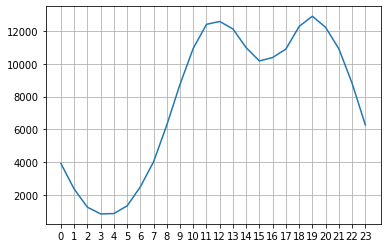

In [ ]:
keys = [pair for pair, df in dfnn.groupby(['Hour'])]

plt.plot(keys, dfnn.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

# My recommendation is before 11 AM or after 6 PM.

#Question : What products are most often sold together?

In [ ]:
order_filter = dfnn[dfnn['Order ID'].duplicated(keep=False)]
order_filter.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
9,278806,Bose SoundSport Headphones,1,99.99,11/19/19 19:12,"174 2nd St, Boston, MA 02215",11,99.99,Boston (MA),19,12,1
10,278806,ThinkPad Laptop,1,999.99,11/19/19 19:12,"174 2nd St, Boston, MA 02215",11,999.99,Boston (MA),19,12,1
15,278811,Wired Headphones,1,11.99,11/06/19 16:01,"99 Elm St, San Francisco, CA 94016",11,11.99,San Francisco (CA),16,1,1
16,278811,Apple Airpods Headphones,1,150.00,11/06/19 16:01,"99 Elm St, San Francisco, CA 94016",11,150.00,San Francisco (CA),16,1,1
24,278819,iPhone,1,700.00,11/04/19 06:20,"880 Maple St, New York City, NY 10001",11,700.00,New York City (NY),6,20,1
25,278819,Apple Airpods Headphones,1,150.00,11/04/19 06:20,"880 Maple St, New York City, NY 10001",11,150.00,New York City (NY),6,20,1
39,278833,iPhone,1,700.00,11/04/19 10:34,"700 Pine St, San Francisco, CA 94016",11,700.00,San Francisco (CA),10,34,1
40,278833,Lightning Charging Cable,2,14.95,11/04/19 10:34,"700 Pine St, San Francisco, CA 94016",11,29.90,San Francisco (CA),10,34,1
47,278840,Bose SoundSport Headphones,1,99.99,11/23/19 20:46,"490 Walnut St, Los Angeles, CA 90001",11,99.99,Los Angeles (CA),20,46,1
48,278840,27in FHD Monitor,1,149.99,11/23/19 20:46,"490 Walnut St, Los Angeles, CA 90001",11,149.99,Los Angeles (CA),20,46,1


In [ ]:
df['Grouped'] = dfnn.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df2.head(15)

,Order ID,Grouped
0,222910,Wired Headphones
1,222911,USB-C Charging Cable
2,222912,Apple Airpods Headphones
3,222913,27in FHD Monitor
4,222914,Bose SoundSport Headphones
5,222915,USB-C Charging Cable
6,222916,Lightning Charging Cable
7,222917,Bose SoundSport Headphones
8,222918,Lightning Charging Cable
9,222919,"Bose SoundSport Headphones,ThinkPad Laptop"


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14261 entries, 0 to 14370
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Order ID  14242 non-null  object
 1   Grouped   14197 non-null  object
dtypes: object(2)
memory usage: 334.2+ KB


In [ ]:
dfdrop = df2.dropna(how='any')
dfdrop

,Order ID,Grouped
0,222910,Wired Headphones
1,222911,USB-C Charging Cable
2,222912,Apple Airpods Headphones
3,222913,27in FHD Monitor
4,222914,Bose SoundSport Headphones
...,...,...
14366,236665,Lightning Charging Cable
14367,236666,LG Dryer
14368,236667,Lightning Charging Cable
14369,236668,Apple Airpods Headphones


In [ ]:
dfdrop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14178 entries, 0 to 14370
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Order ID  14178 non-null  object
 1   Grouped   14178 non-null  object
dtypes: object(2)
memory usage: 332.3+ KB


In [ ]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in dfdrop['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key,value)
    print("-------------------------------------")

('iPhone', 'Lightning Charging Cable') 163
-------------------------------------
('Google Phone', 'USB-C Charging Cable') 145
-------------------------------------
('Google Phone', 'Wired Headphones') 68
-------------------------------------
('iPhone', 'Wired Headphones') 66
-------------------------------------
('Vareebadd Phone', 'USB-C Charging Cable') 65
-------------------------------------
('iPhone', 'Apple Airpods Headphones') 61
-------------------------------------
('Google Phone', 'Bose SoundSport Headphones') 33
-------------------------------------
('USB-C Charging Cable', 'Wired Headphones') 28
-------------------------------------
('Lightning Charging Cable', 'Wired Headphones') 24
-------------------------------------
('Vareebadd Phone', 'Bose SoundSport Headphones') 23
-------------------------------------


#Question : Highest Selling Product? And why did it sold off the most?

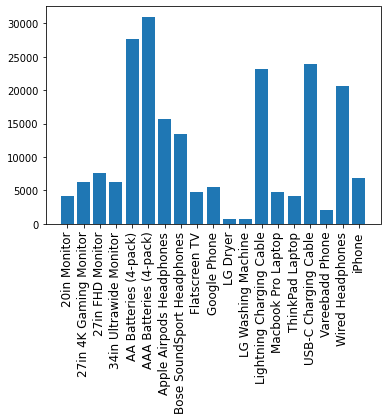

In [ ]:
product_group = dfnn.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=12)
plt.show()



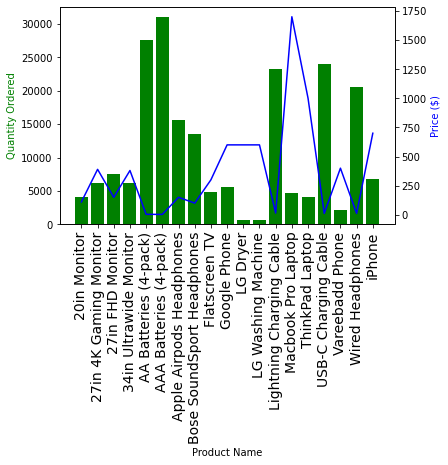

In [ ]:
prices = dfnn.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=14)

fig.show()